In [1]:
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# load boxes.npy and masks.npy

In [69]:
%ls ./root/results/Result2021-12-22_02:08:23_EST-0500/rois/

NDA0_boxes.npy   NDA15_masks.npy  NDA21_boxes.npy  NDA4_masks.npy
NDA0_masks.npy   NDA16_boxes.npy  NDA21_masks.npy  NDA5_boxes.npy
NDA10_boxes.npy  NDA16_masks.npy  NDA22_boxes.npy  NDA5_masks.npy
NDA10_masks.npy  NDA17_boxes.npy  NDA22_masks.npy  NDA6_boxes.npy
NDA11_boxes.npy  NDA17_masks.npy  NDA23_boxes.npy  NDA6_masks.npy
NDA11_masks.npy  NDA18_boxes.npy  NDA23_masks.npy  NDA7_boxes.npy
NDA12_boxes.npy  NDA18_masks.npy  NDA24_boxes.npy  NDA7_masks.npy
NDA12_masks.npy  NDA19_boxes.npy  NDA24_masks.npy  NDA8_boxes.npy
NDA13_boxes.npy  NDA19_masks.npy  NDA2_boxes.npy   NDA8_masks.npy
NDA13_masks.npy  NDA1_boxes.npy   NDA2_masks.npy   NDA9_boxes.npy
NDA14_boxes.npy  NDA1_masks.npy   NDA3_boxes.npy   NDA9_masks.npy
NDA14_masks.npy  NDA20_boxes.npy  NDA3_masks.npy
NDA15_boxes.npy  NDA20_masks.npy  NDA4_boxes.npy


In [52]:
sdir="./root/results/Result2021-12-22_02:44:56_EST-0500/"
name="NDAcquisition-01x40_XY0100.ome.tif"
print(name[:len(name)-4])

NDAcquisition-01x40_XY0100.ome


In [53]:
boxes = np.load(sdir+"rois/"+name[:len(name)-4]+"_boxes.npy",allow_pickle=True)
masks = np.load(sdir+"rois/"+name[:len(name)-4]+"_masks.npy",allow_pickle=True)

In [54]:
print("boxes.shape",boxes.shape)
print("masks.shape",masks.shape)

boxes.shape (39, 4)
masks.shape (512, 512, 39)
boxes[0] [371 337 387 352]


# Transform boxes and masks from 512 => 2560

## 1. box in 512 ==> 2560

In [55]:
# box in 512 ==> 2560
box_all=[]
for x in range(boxes.shape[0]):
    box_all.append([boxes[x][0]*5, boxes[x][1]*5, (boxes[x][2]+1)*5-1, (boxes[x][3]+1)*5-1])
box_all = np.array(box_all)

print("box_all.shape：", box_all.shape)
print("box[1] before：", boxes[1])      
print("box[1] after：", box_all[1])
print("")

box_all.shape： (39, 4)
box[1] before： [173 416 184 425]
box[1] after： [ 865 2080  924 2129]



## 2. mask 512 * 512 ==> 2560 * 2560

In [57]:
img_mask_all = []

for i in range(masks.shape[2]):
    mask = masks[:,:,i]
    img_mask = np.zeros((2560,2560))
    for x in range(512):
        for y in range(512):
            if mask[x][y] == True:
                for m in range(5*x,5*(x+1)):
                    for n in range(5*y,5*(y+1)):
                        img_mask[m][n]=1
    img_mask_all.append(img_mask)
    
img_mask_all = np.array(img_mask_all)
print("img_mask_all.shape：", img_mask_all.shape)

img_mask_all.shape： (39, 2560, 2560)


For example：


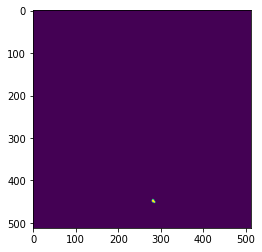

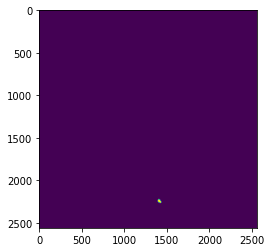

In [120]:
# For example
print("For example：")
# mask 512*512
n=10
mask=masks[:,:,n]
img_mask = np.zeros((512,512))
for x in range(512):
    for y in range(512):
        if mask[x][y] == True:
            img_mask[x][y]=1
            
# img_mask=cv2.merge([img_mask,img_mask,img_mask])
plt.imshow(img_mask)
plt.show()     

# mask 5120*5120
plt.imshow(img_mask_all[n])
plt.show()

pic.shape (54, 44, 3)


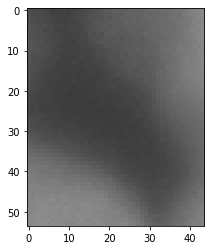

mask.shape (54, 44, 3)


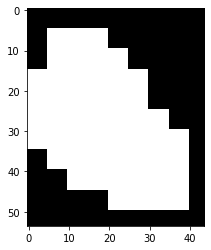

pic_mask.shape (54, 44, 3)


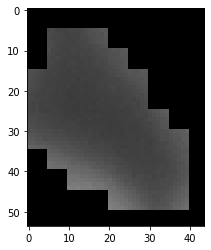

In [121]:
img = cv2.imread("../../Datasets/NDAcquisition/NDAcquisition-01x40/NDAcquisition-01x40_XY0100.ome.tif")
img=cv2.copyMakeBorder(img,128,128,128,128,cv2.BORDER_CONSTANT,value=(0,0,0))

i=10
pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
print("pic.shape",pic.shape)
plt.imshow(pic)
plt.show()

mask = img_mask_all[i,:,:]
mask = mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
mask = cv2.merge([mask,mask,mask])
print("mask.shape",mask.shape)
plt.imshow(mask)
plt.show()


pic_mask=np.multiply(pic,mask)
pic_mask=pic_mask.astype(np.uint8)
print("pic_mask.shape",pic_mask.shape)
plt.imshow(pic_mask)
plt.show()

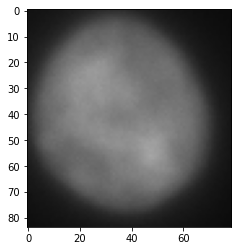

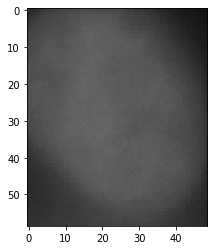

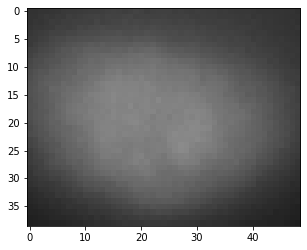

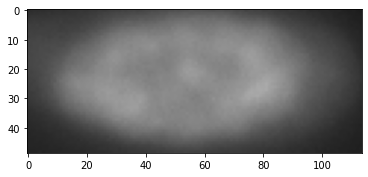

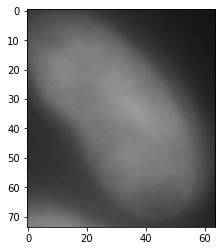

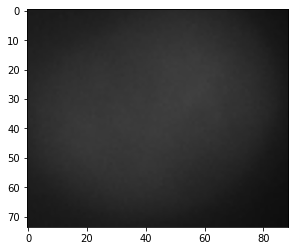

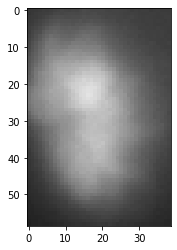

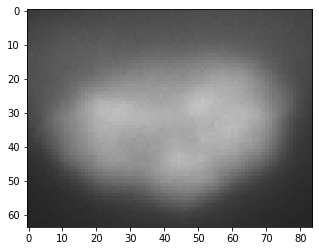

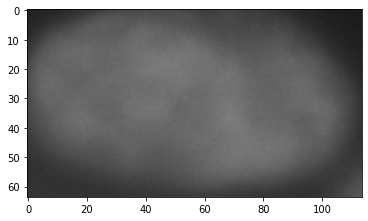

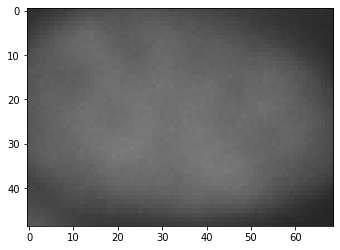

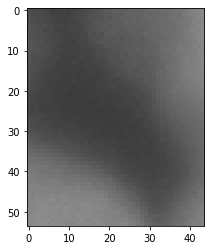

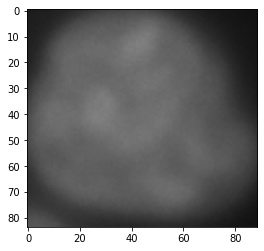

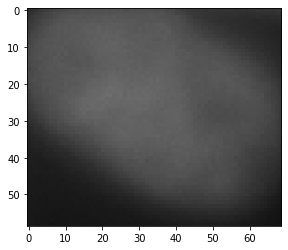

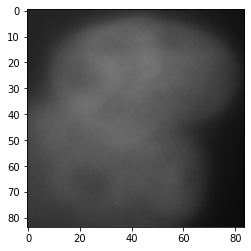

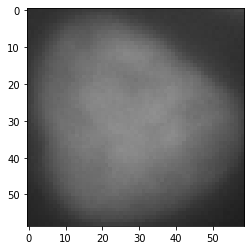

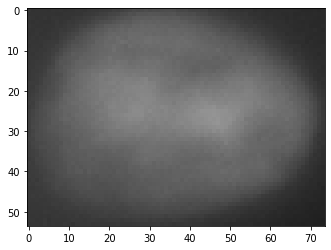

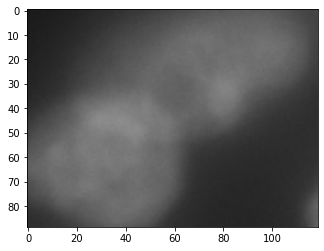

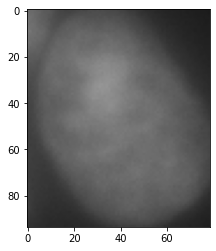

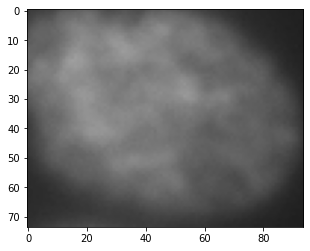

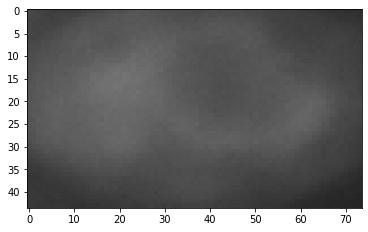

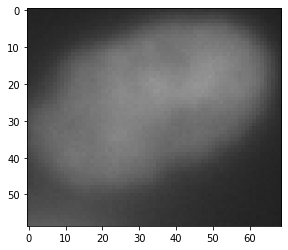

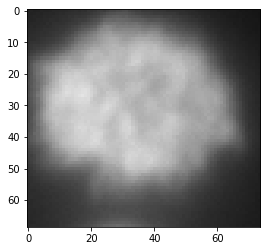

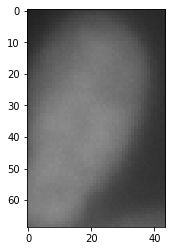

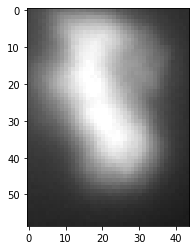

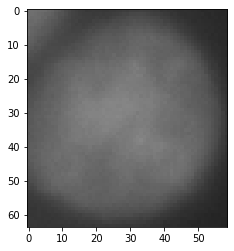

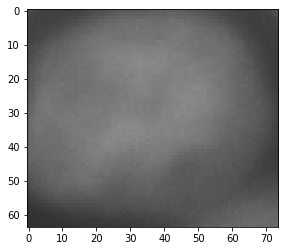

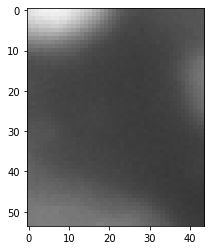

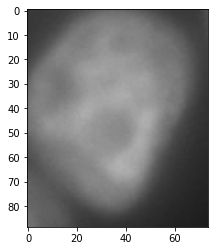

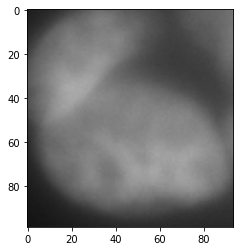

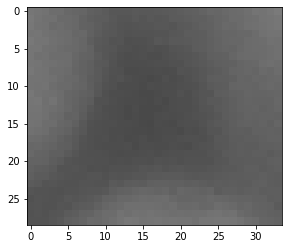

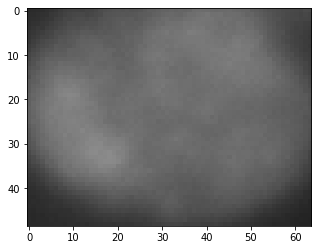

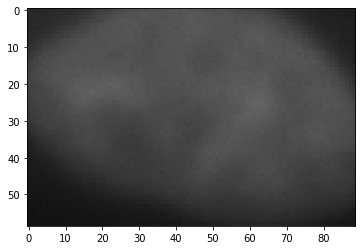

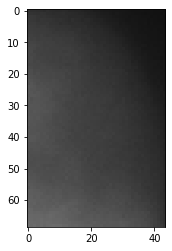

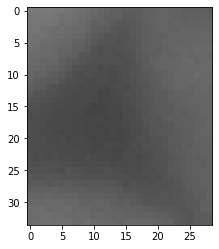

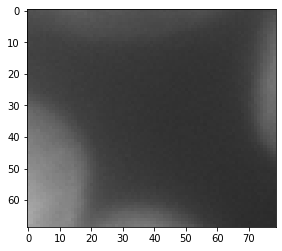

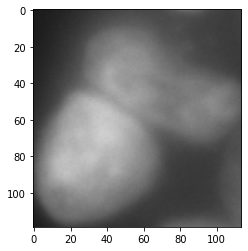

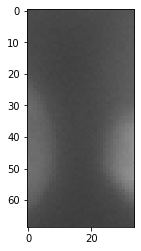

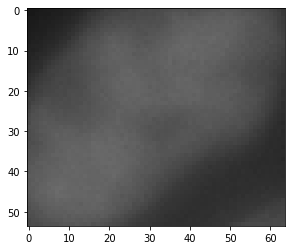

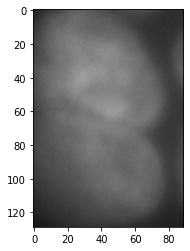

In [78]:
# plt.figure(figsize=(40,40))

imgpath="../../Datasets/NDAcquisition/NDAcquisition-01x40/"
img = cv2.imread(imgpath+"/NDAcquisition-01x40_XY0100.ome.tif")
img=cv2.copyMakeBorder(img,128,128,128,128,cv2.BORDER_CONSTANT,value=(0,0,0))

for i in range(box_all.shape[0]):
    pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]

    mask = img_mask_all[i,:,:]
    mask=mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
    mask = cv2.merge([mask,mask,mask])

    pic_mask=np.multiply(pic,mask)
    pic_mask=pic_mask.astype(np.uint8)
    
    plt.imshow(pic)
    plt.show()
#     cv2.imwrite(savepath + name[0:len(name)-4] + "_"+str(i)+'.tif', pic_mask)
# print("Successful saved : " + name)

## Set save path

In [58]:
%rm -r ../../Datasets/NDAcquisition/CellNDA_01x40/
savepath =  "../../Datasets/NDAcquisition/CellNDA_01x40/"
if not os.path.exists(savepath):
    os.makedirs(savepath)
    print("mkdir: ../../Datasets/NDAcquisition/CellNDA_01x40/")

mkdir: ../../Datasets/NDAcquisition/CellNDA_01x40/


In [ ]:
load="../../Datasets/NDAcquisition/NDAcquisition-01/"

sdir="./root/results/Result2021-12-22_02:44:56_EST-0500/"

num=1
ooo=1

for root,dirs,files in os.walk(load):
    for file_name in files:
        file = os.path.join(root,file_name)
        name = os.path.join(file_name)
        # read image and padding
        img = cv2.imread(file)
        img=cv2.copyMakeBorder(img,128,128,128,128,cv2.BORDER_CONSTANT,value=(0,0,0))
        
        # read boxes and masks
        boxes = np.load(sdir+"rois/"+name[:len(name)-4]+"_boxes.npy",allow_pickle=True)
        masks = np.load(sdir+"rois/"+name[:len(name)-4]+"_masks.npy",allow_pickle=True)
        
        # transform boxes
        box_all=[]
        for x in range(boxes.shape[0]):
            box_all.append([boxes[x][0]*5, boxes[x][1]*5, (boxes[x][2]+1)*5-1, (boxes[x][3]+1)*5-1])
        box_all = np.array(box_all)
        
        # transform masks
        img_mask_all = []
        for i in range(masks.shape[2]):
            mask = masks[:,:,i]
            img_mask = np.zeros((2560,2560))
            for x in range(512):
                for y in range(512):
                    if mask[x][y] == True:
                        for m in range(5*x,5*(x+1)):
                            for n in range(5*y,5*(y+1)):
                                img_mask[m][n]=1
            img_mask_all.append(img_mask)
        img_mask_all = np.array(img_mask_all)
        
        #pick cell form whole image
        for i in range(box_all.shape[0]):
            pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]

            mask = img_mask_all[i,:,:]
            mask=mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
            mask = cv2.merge([mask,mask,mask])

            pic_mask=np.multiply(pic,mask)
            pic_mask=pic_mask.astype(np.uint8)
            cv2.imwrite(savepath + name[:20] +str(num)+'.tif', pic_mask)
            num += 1
        print(ooo)
        ooo+=1

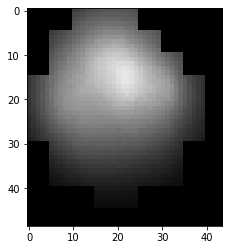

In [90]:
path = "../../Datasets/NDAcquisition/CellNDA_01x40/NDAcquisition-01_XY013.tif"
img=cv2.imread(path)
plt.imshow(img)
plt.show()

In [92]:
%ls ../../Datasets/NDAcquisition/CellNDA_01x40/

NDAcquisition-01_XY0100.tif   NDAcquisition-01_XY12436.tif
NDAcquisition-01_XY0101.tif   NDAcquisition-01_XY12437.tif
NDAcquisition-01_XY0102.tif   NDAcquisition-01_XY12438.tif
NDAcquisition-01_XY0103.tif   NDAcquisition-01_XY12439.tif
NDAcquisition-01_XY0104.tif   NDAcquisition-01_XY12440.tif
NDAcquisition-01_XY0105.tif   NDAcquisition-01_XY12441.tif
NDAcquisition-01_XY0106.tif   NDAcquisition-01_XY12442.tif
NDAcquisition-01_XY0107.tif   NDAcquisition-01_XY12443.tif
NDAcquisition-01_XY0108.tif   NDAcquisition-01_XY12444.tif
NDAcquisition-01_XY0109.tif   NDAcquisition-01_XY12445.tif
NDAcquisition-01_XY010.tif    NDAcquisition-01_XY12446.tif
NDAcquisition-01_XY0110.tif   NDAcquisition-01_XY12447.tif
NDAcquisition-01_XY0111.tif   NDAcquisition-01_XY12448.tif
NDAcquisition-01_XY0112.tif   NDAcquisition-01_XY12449.tif
NDAcquisition-01_XY0113.tif   NDAcquisition-01_XY12450.tif
NDAcquisition-01_XY0114.tif   NDAcquisition-01_XY12451.tif
NDAcquisition-01_XY0115.tif   NDAcquisition-01_XY12452.t

In [115]:
load="../../Datasets/NDAcquisition/NDAcquisition-01/"
load[29:]

'NDAcquisition-01/'

In [99]:
%ls ../../Datasets/NDAcquisition

CellNDA_01x40/     NDAcquisition-01x40/       NDAcquisition-02Nami_x40/
NDAcquisition-01/  NDAcquisition-02Nami_x20/


In [118]:
%ls ../../Datasets/NDAcquisition/

NDAcquisition-01/     NDAcquisition-02Nami_x20/
NDAcquisition-01x40/  NDAcquisition-02Nami_x40/


In [119]:
%mkdir ../../Datasets/NDAcquisition/CellNDA_01x40/